In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
#Performs the sampling integration method (Monte Carlo). 
#Takes as parameters a function, the number of function parameters, and the number of points used to calculate the integral approximation.
def monte_carlo(function, num_parameters, num_points, upper_limit = 1.0, lower_limit = 0.0):
    integrals = np.zeros(num_points)
    
    if(upper_limit == 1 and lower_limit == 0):
        for i in range(num_points):
            parameters = np.random.random(num_parameters)
            integrals[i] = function(parameters)
            
    else:
        for i in range(num_points):
            parameters = np.random.uniform(lower_limit, upper_limit, num_parameters)
            integrals[i] = function(parameters)

    return (upper_limit - lower_limit) * np.mean(integrals)

In [57]:
#Performs 1000 rounds of Monte Carmo simulation with differents sampling parameters(100, 1000 and 10000 points).
#Returns a dataframe with the results of each simulation (100, 1000 and 10000 points)

def results_mc_1000(f_x, num_parameters, upper_limit = 1, lower_limit = 0):
    #Creating the dataframe to allocate the results
    columns = ["100", "1000", "10000"]
    df = pd.DataFrame(columns=columns)

    #Vector to save the results of each monte carlo simulation
    results = np.zeros(1000)

    #Get the results for Monte Carlo with 100 points
    for i in range(1000):
        results[i] = monte_carlo(f_x, num_parameters, 100, upper_limit=upper_limit, lower_limit=lower_limit)
    df['100'] = results

    #Get the results for Monte Carlo with 1000 points
    for i in range(1000):
        results[i] = monte_carlo(f_x, num_parameters, 1000, upper_limit=upper_limit, lower_limit=lower_limit)
    df['1000'] = results

    #Get the results for Monte Carlo with 10000 points
    for i in range(1000):
        results[i] = monte_carlo(f_x, num_parameters, 10000, upper_limit=upper_limit, lower_limit=lower_limit)
    df['10000'] = results
    
    return df

In [58]:
#Calculates the mean and std error over each dataframe column. Returns a dataframe containing the results (in each collum, the first...
#...element is related to the mean and the second is related to the std error of the original column.
def gen_mean_and_error_table(table):
    table_df = table.copy()
    columns = table_df.columns
    
    mean_and_error_df = pd.DataFrame(columns=columns)
    for column in columns:
        #Array to plug into the mean_and_error_df
        results = np.zeros(2)

        mean = np.mean(table_df[column])
        size = len(table_df[column])
        std_error = np.std(table_df[column]) / np.sqrt(size)

        results[0] = mean
        results[1] = std_error
        mean_and_error_df[column] = results
    
    return mean_and_error_df



## Calculando a integral definida de 0 a 1 da função $f(x) = (1 - x²)$

In [59]:
#Defining the function f(x)
def f_x(parameters):
    x = parameters[0]
    return (1 - x*x)

In [60]:
#Run simulation
df = results_mc_1000(f_x, 1)

Text(0.5, 1.0, '$\\int_{0}^{1} (1 - x²) \\, dx$ - Método Monte Carlo')

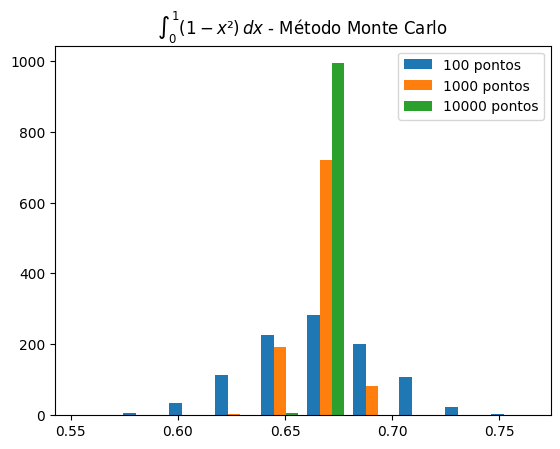

In [61]:
columns = ['100', '1000', '10000']

labels = columns.copy()
for i in range(len(columns)):
    labels[i] = columns[i] + " pontos"

#Plot the results
plt.hist(df, label=labels)
plt.legend()
plt.title(r'$\int_{0}^{1} (1 - x²) \, dx$ - Método Monte Carlo')

In [62]:
#Get metrics
metrics = gen_mean_and_error_table(df)
new_column = [ 'Integral calculada', 'Erro estatístico']
metrics.insert(0, '', new_column)
print(metrics.to_markdown())

|    |                    |         100 |        1000 |       10000 |
|---:|:-------------------|------------:|------------:|------------:|
|  0 | Integral calculada | 0.666954    | 0.666777    | 0.66676     |
|  1 | Erro estatístico   | 0.000935935 | 0.000309498 | 9.87731e-05 |


|    |                    |         100 |        1000 |       10000 |
|---:|:-------------------|------------:|------------:|------------:|
|  0 | Integral calculada | 0.666954    | 0.666777    | 0.66676     |
|  1 | Erro estatístico   | 0.000935935 | 0.000309498 | 9.87731e-05 |

## Calculando a integral definida de 0 a 1 da função $f(x) = e^{x}$

In [63]:
#Defining the function f(x)
def f_x(parameters):
    e = np.e
    x = parameters[0]
    return (e ** x)

In [64]:
#Run simulation
df = results_mc_1000(f_x, 1)

Text(0.5, 1.0, '$\\int_{0}^{1} e^{x} \\, dx$ - Método Monte Carlo')

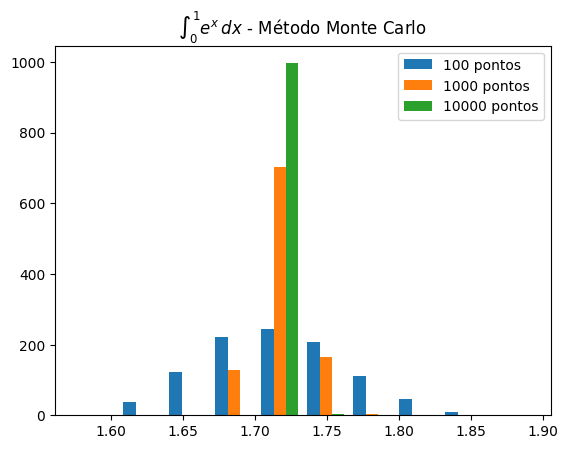

In [65]:
labels = columns.copy()
for i in range(len(columns)):
    labels[i] = columns[i] + " pontos"

#Plot the results
plt.hist(df, label=labels)
#plt.axvline(real_function, color='red', linestyle='dashed', linewidth=2, label='Função real')
plt.legend()
plt.title(r'$\int_{0}^{1} e^{x} \, dx$ - Método Monte Carlo')

In [66]:
#Get metrics
metrics = gen_mean_and_error_table(df)
new_column = [ 'Integral calculada', 'Erro estatístico']
metrics.insert(0, '', new_column)
print(metrics.to_markdown())

|    |                    |        100 |        1000 |       10000 |
|---:|:-------------------|-----------:|------------:|------------:|
|  0 | Integral calculada | 1.71762    | 1.7184      | 1.71836     |
|  1 | Erro estatístico   | 0.00151337 | 0.000484828 | 0.000156018 |


|    |                    |        100 |        1000 |       10000 |
|---:|:-------------------|-----------:|------------:|------------:|
|  0 | Integral calculada | 1.71762    | 1.7184      | 1.71836     |
|  1 | Erro estatístico   | 0.00151337 | 0.000484828 | 0.000156018 |

## Calculando a integral definida de 0 a $\pi$ da função $f(x) = \sin²(x)$

In [67]:
#Defining the function f(x)
def f_x(parameters):
    x = parameters[0]
    s = np.sin(x)
    return (s * s)

In [68]:
#Run simulation
df = results_mc_1000(f_x, 1, upper_limit = np.pi)

Text(0.5, 1.0, '$\\int_{0}^{\\pi} \\sin²(x) \\, dx$ - Método Monte Carlo')

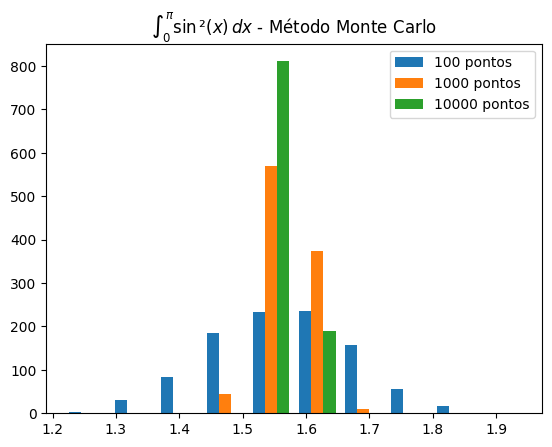

In [69]:
labels = columns.copy()
for i in range(len(columns)):
    labels[i] = columns[i] + " pontos"

#Plot the results
plt.hist(df, label=labels)
#plt.axvline(real_function, color='red', linestyle='dashed', linewidth=2, label='Função real')
plt.legend()
plt.title(r'$\int_{0}^{\pi} \sin²(x) \, dx$ - Método Monte Carlo')

In [70]:
#Get metrics
metrics = gen_mean_and_error_table(df)
new_column = [ 'Integral calculada', 'Erro estatístico']
metrics.insert(0, '', new_column)
print(metrics.to_markdown())

|    |                    |       100 |       1000 |       10000 |
|---:|:-------------------|----------:|-----------:|------------:|
|  0 | Integral calculada | 1.56983   | 1.57017    | 1.57069     |
|  1 | Erro estatístico   | 0.0034577 | 0.00111555 | 0.000362966 |


|    |                    |       100 |       1000 |       10000 |
|---:|:-------------------|----------:|-----------:|------------:|
|  0 | Integral calculada | 1.56983   | 1.57017    | 1.57069     |
|  1 | Erro estatístico   | 0.0034577 | 0.00111555 | 0.000362966 |

## Calculando a integral multipla $\int_{0}^{1} ... \int_{0}^{1}\frac{1}{((x_1 + x_2)x_3 + (y_1 + y_2)y_3 + (z_1 + z_2)z_3)}$

In [75]:
#Defining the function f(x)
def f_x(parameters):
    x1 = parameters[0]
    x2 = parameters[1]
    x3 = parameters[2]
    y1 = parameters[3]
    y2 = parameters[4]
    y3 = parameters[5]
    z1 = parameters[6]
    z2 = parameters[7]
    z3 = parameters[8]

    r = 1 /((x1 + x2)*x3 +(y1 + y2)*y3 + (z1 + z2)*z3) 
    return (r)

In [79]:
#Run simulation
df = results_mc_1000(f_x, 9)

Text(0.5, 1.0, '$\\int_{0}^{1} ... \\int_{0}^{1}\\frac{1}{((x_1 + x_2)x_3 + (y_1 + y_2)y_3 + (z_1 + z_2)z_3)}$ - Método Monte Carlo')

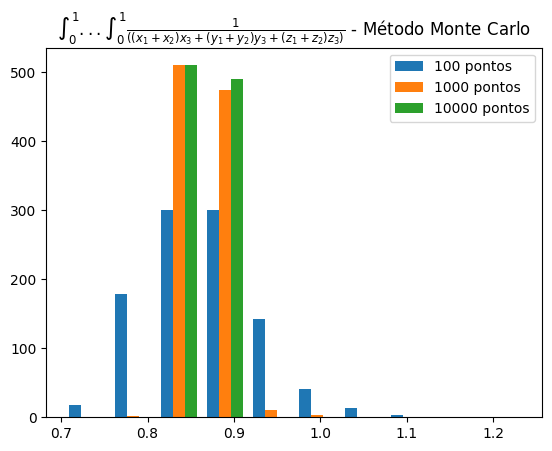

In [85]:
labels = columns.copy()
for i in range(len(columns)):
    labels[i] = columns[i] + " pontos"

#Plot the results
plt.hist(df, label=labels)
#plt.axvline(real_function, color='red', linestyle='dashed', linewidth=2, label='Função real')
plt.legend()
plt.title(r'$\int_{0}^{1} ... \int_{0}^{1}\frac{1}{((x_1 + x_2)x_3 + (y_1 + y_2)y_3 + (z_1 + z_2)z_3)}$ - Método Monte Carlo')

In [86]:
#Get metrics
metrics = gen_mean_and_error_table(df)
new_column = [ 'Integral calculada', 'Erro estatístico']
metrics.insert(0, '', new_column)
print(metrics.to_markdown())

|    |                    |       100 |        1000 |       10000 |
|---:|:-------------------|----------:|------------:|------------:|
|  0 | Integral calculada | 0.867649  | 0.864044    | 0.863106    |
|  1 | Erro estatístico   | 0.0020588 | 0.000716132 | 0.000216416 |


|    |                    |       100 |        1000 |       10000 |
|---:|:-------------------|----------:|------------:|------------:|
|  0 | Integral calculada | 0.867649  | 0.864044    | 0.863106    |
|  1 | Erro estatístico   | 0.0020588 | 0.000716132 | 0.000216416 |